<a href="https://colab.research.google.com/github/hbechara/HertieML/blob/main/Lesson3MLLandscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PSA:** Do remember that project proposals are due next week. If you don't have a group or a project idea yet, find a time machine, go back to two weeks ago, and find a team.

Today:

- The Machine Learning Landscape
- Getting started with Scikit Learn

Supervised vs Unsupervised ML

- Supervised ML
  - k-Nearest Neighbours
  - Linear Regression
  - Logistic Regression
  - Support Vector Machines
  - Decision Trees and Random Forests
  - Neural Networks

- Unsupervised ML
 - Please don't leave your MLs unsupervised

Instance vs Model Based Learning

Instance Based Learning: compares new problem instances with instances seen in training, which have been stored in memory.
Eg- k-nearest neighbour, decision tree

Model Based Learning: Builds a model from a set of examples, using fixed parametres, and generalises to new instances.

What is [Scikit Learn](https://scikit-learn.org/stable/)?

- A Machine Learning Library for Python
- Your best friend and companion for the duration of this course
- Awesome



Make sure you have Python 3.5+ and that you have Scikit Learn [installed](https://scikit-learn.org/stable/install.html).

In [ ]:
!pip install -U scikit-learn

You can check your installation:

In [ ]:
!python -m pip show scikit-learn  
!python -m pip freeze  
!python -c "import sklearn; sklearn.show_versions()"

**Let's look at an example:**

Training and running a linear model with Scikit-Learn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

**Remember:**

We covered numpy and pandas in the previous two sessions.
- [numpy](https://numpy.org/) is a package for scientific computing (remember all the fun we had with tensors and matrices?)
- [pandas](https://pandas.pydata.org/docs) is a data analysis library, which we used mostly for dataframes so far

**Every ML problem starts with Data**

- Let's use the data example in the book. 
- Let's download and merge their data (because they've decided to make it difficult for us)

In [ ]:
# Download the data
import urllib.request
import os
datapath = os.path.join("datasets", "lifesat", "")

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [ ]:
# This function just merges the data we need, you can ignore it and hope that 
# all future data comes pre-merged.

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [ ]:
# Let's import matplotlib for some visualisations
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Now we can load our csv files directly into dataframes (just as we demonstrated last week).

In [ ]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

Let's merge the data by country and then set our dependent and independent variables:

In [ ]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


In [ ]:
X

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [ ]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


Now, let's visualise it in a scatterplot. We're plotting GDP vs Life satisfaction.

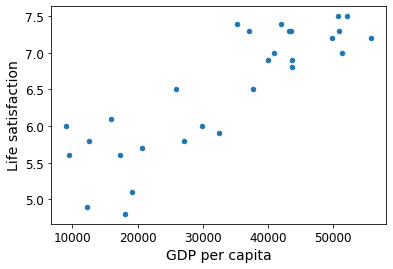

In [ ]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

Now let's do some actual Machine Learning:

- First let's select a [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
# Select a linear model
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()


Now we can train the model using fit()
 - Fitting your model to the training data the training part of the modelling process. 
 -  It will give you a function that represents a line that is best fits all the points. 
 - With that line function you can estimate other results.

 Note that fit does not return anything. It direcly modifes the model, which you will then use to make predictions.

In [ ]:
# Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's make a prediction for Cyprus, whose GDP is 22587

In [ ]:
X_new = [[22587]]  
print(model.predict(X_new)) 

[[5.96242338]]


Let's make some changes to this code:
- Let's change the model from a linear regression model to a k-nearest neighbours regression (set k to 3).


Share your solution!

The solution is pretty simple:

In [ ]:
import sklearn.neighbors
# Select the new model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
# Train the model
model.fit(X, y)
X_new = [[22587]]  
print(model.predict(X_new)) 

[[5.76666667]]


Try it yourself:

[Here](https://github.com/hbechara/DLData) I've uploaded two files with mean temperature changes since 1950. 

- Either download the files or load them straight from github.
- Modify the code we worked on today in order to plot mean temperature differences per year
- Perform Linear Regression with Scikit Learn




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
yearsTrain, meanTrain = np.loadtxt('/content/5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
yearsTrain, meanTrain = np.loadtxt('/content/5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

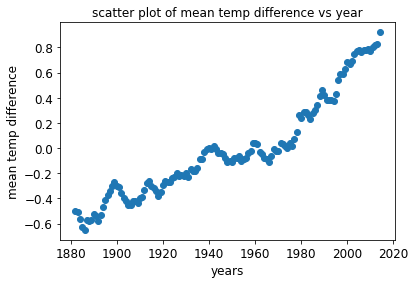

In [ ]:
plt.scatter(yearsTrain, meanTrain)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

In [ ]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

#Fit/build the model
model.fit(yearsTrain[:, np.newaxis], meanTrain)
mean_predicted = model.predict(yearsTrain[:, np.newaxis])

In [ ]:
X_new =[[2030]]
print(model.predict(X_new)) 

[0.78930852]
